<a href="https://colab.research.google.com/github/yoraoktaar/CNN-MNIST/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
# Load data MNIST dari TensorFlow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (60000, 28, 28)
Shape y_train: (60000,)
Shape X_test: (10000, 28, 28)
Shape y_test: (10000,)


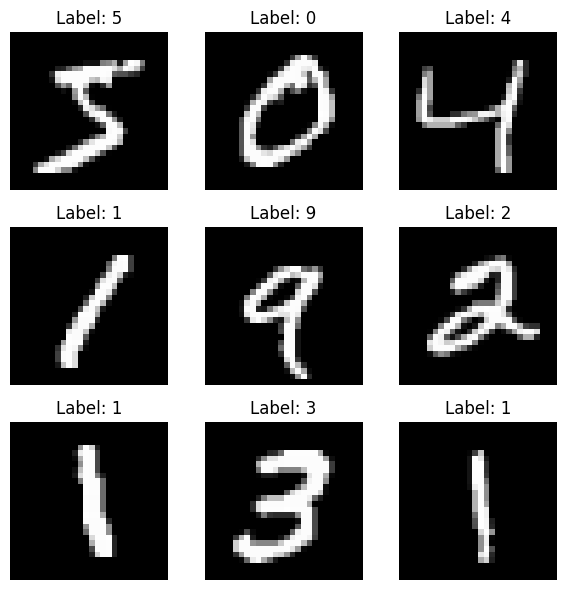

In [8]:
# Visualisasi 9 gambar pertama
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

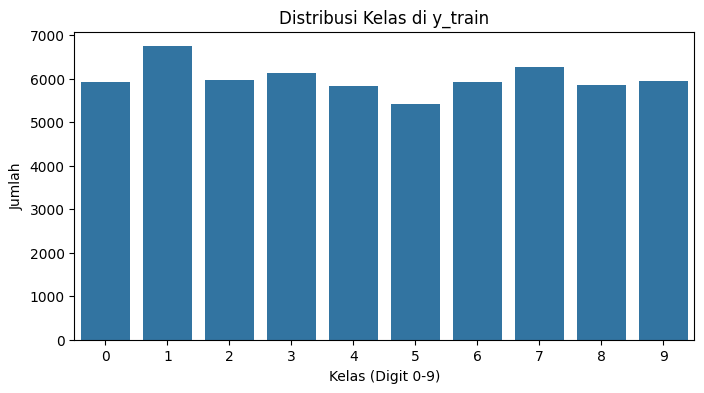

In [9]:
# Distribusi label kelas pada y_train
plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Distribusi Kelas di y_train")
plt.xlabel("Kelas (Digit 0-9)")
plt.ylabel("Jumlah")
plt.show()

In [10]:
# Normalisasi Nilai Piksel (0-255 → 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [11]:
# Reshape Data (karena gambar grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Shape baru X_train:", X_train.shape)

Shape baru X_train: (60000, 28, 28, 1)


In [13]:
#  One-hot Encoding untuk Label Kelas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Contoh one-hot label y_train[0]:", y_train[0])

Contoh one-hot label y_train[0]: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Fungsi**

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

def preprocess_mnist():
    # 1. Load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # 2. Normalisasi nilai piksel ke rentang 0–1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # 3. Reshape ke format (jumlah_data, tinggi, lebar, channel)
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # 4. One-hot encoding label
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, y_train, X_test, y_test

In [15]:
X_train, y_train, X_test, y_test = preprocess_mnist()

# Cek hasil
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Contoh label one-hot:", y_train[0])

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Contoh label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def preprocess_mnist(show_summary=True):
    # 1. Load dataset
    (X_train, y_train_raw), (X_test, y_test_raw) = mnist.load_data()

    if show_summary:
        print("Original X_train shape:", X_train.shape)
        print("Original y_train shape:", y_train_raw.shape)

    # 2. Normalisasi
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # 3. Reshape
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # 4. One-hot encoding
    y_train = to_categorical(y_train_raw, 10)
    y_test = to_categorical(y_test_raw, 10)

    # 5. Visualisasi 9 gambar pertama
    if show_summary:
        plt.figure(figsize=(6,6))
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(X_train[i].reshape(28,28), cmap='gray')
            plt.title(f"Label: {np.argmax(y_train[i])}")
            plt.axis('off')
        plt.suptitle("Contoh Gambar MNIST")
        plt.tight_layout()
        plt.show()

    # 6. Distribusi kelas (jumlah per label)
    if show_summary:
        sns.countplot(x=y_train_raw)
        plt.title("Distribusi Jumlah Data per Kelas (0-9)")
        plt.xlabel("Digit")
        plt.ylabel("Jumlah")
        plt.show()

    return X_train, y_train, X_test, y_test

Original X_train shape: (60000, 28, 28)
Original y_train shape: (60000,)


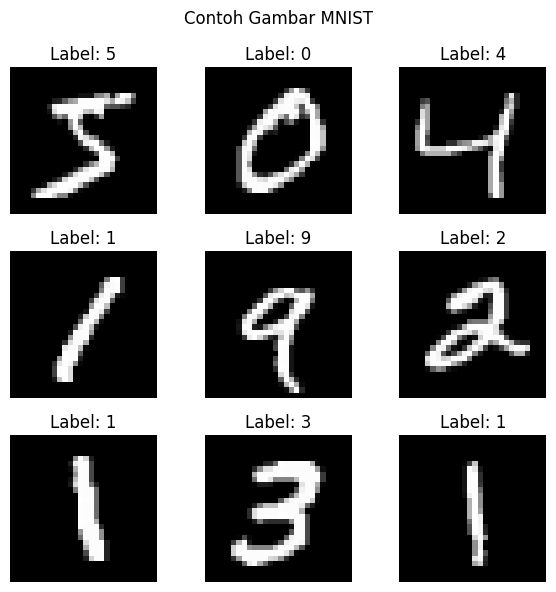

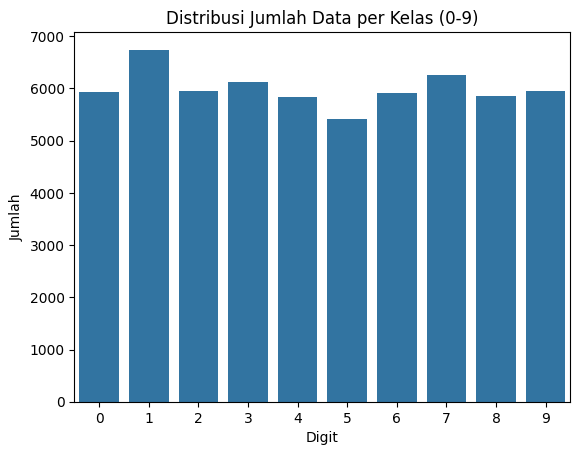

In [17]:
X_train, y_train, X_test, y_test = preprocess_mnist()

**CNN Sederhana untuk MNIST**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_mnist_cnn():
    model = Sequential([
        # Layer konvolusi pertama
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),

        # Layer konvolusi kedua
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Flatten dan Fully Connected Layer
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # mencegah overfitting
        Dense(10, activation='softmax')  # output 10 kelas
    ])

    # Kompilasi model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Original X_train shape: (60000, 28, 28)
Original y_train shape: (60000,)


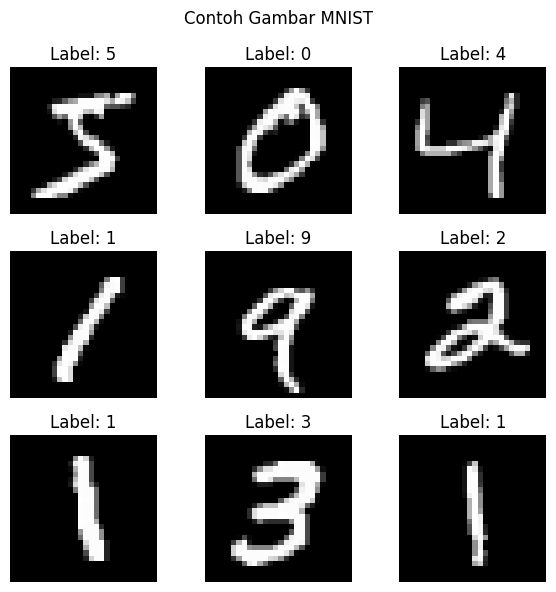

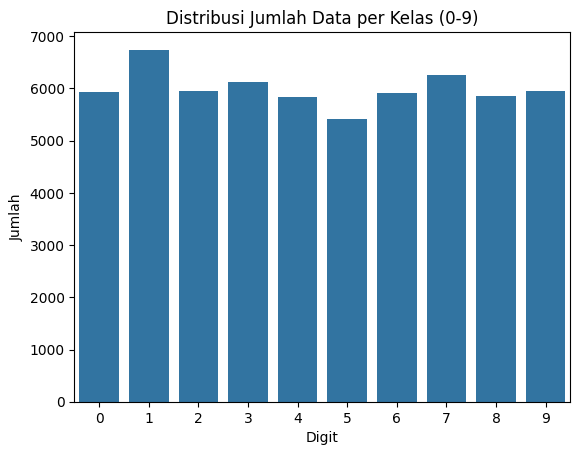

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8441 - loss: 0.5050 - val_accuracy: 0.9867 - val_loss: 0.0491
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9730 - loss: 0.0875 - val_accuracy: 0.9870 - val_loss: 0.0412
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9802 - loss: 0.0652 - val_accuracy: 0.9908 - val_loss: 0.0321
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9920 - val_loss: 0.0299
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9888 - loss: 0.0366 - val_accuracy: 0.9905 - val_loss: 0.0330
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9925 - val_loss: 0.0307
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9910 - loss: 0.0293 - 

In [19]:
# Preprocessing data
X_train, y_train, X_test, y_test = preprocess_mnist()

# Build model CNN
model = build_mnist_cnn()

# Ringkasan model
model.summary()

# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

In [20]:
# Evaluasi akurasi di data test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Akurasi di data test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9899 - loss: 0.0288
Akurasi di data test: 0.9924


In [21]:
# EarlyStopping dan ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Early stopping dan simpan model terbaik
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_mnist_cnn.h5", save_best_only=True)

# Training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9937 - loss: 0.0190

844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9923 - val_loss: 0.0307
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.9944 - loss: 0.0157 - val_accuracy: 0.9915 - val_loss: 0.0366
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9918 - val_loss: 0.0353
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9907 - val_loss: 0.0406


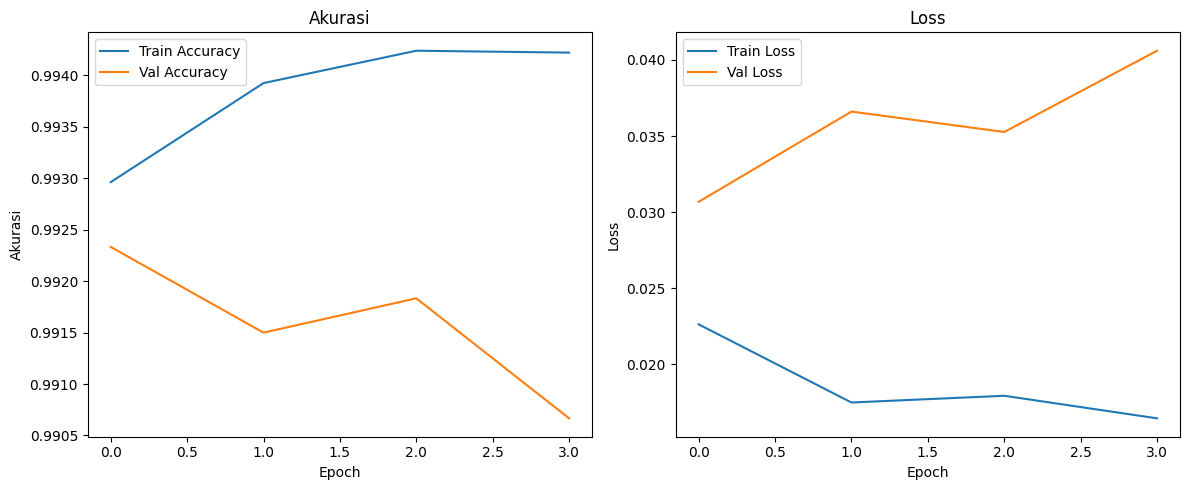

In [22]:
# Grafik akurasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Simpan model akhir (jika belum disimpan lewat checkpoint)
model.save("final_mnist_model.h5")

In [24]:
# Load kembali model
from tensorflow.keras.models import load_model
model = load_model("best_mnist_cnn.h5")

**Evaluasi Model CNN dengan Confusion Matrix dan Classification Report**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


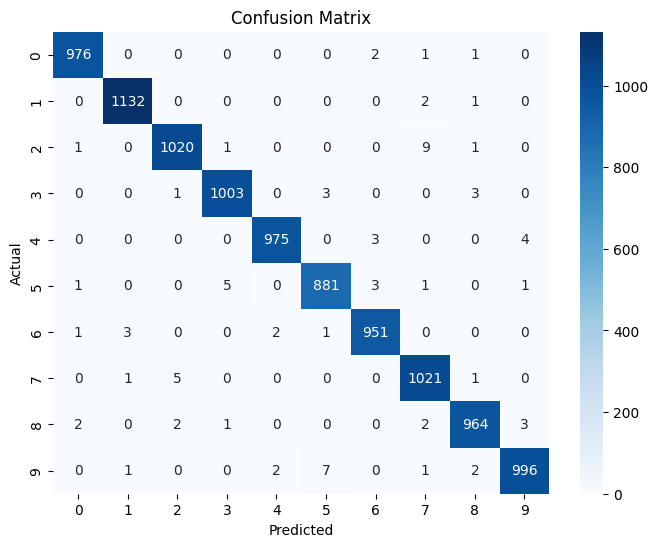

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas (dari one-hot ke label)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9949    0.9959    0.9954       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9922    0.9884    0.9903      1032
           3     0.9931    0.9931    0.9931      1010
           4     0.9959    0.9929    0.9944       982
           5     0.9877    0.9877    0.9877       892
           6     0.9917    0.9927    0.9922       958
           7     0.9846    0.9932    0.9889      1028
           8     0.9908    0.9897    0.9902       974
           9     0.9920    0.9871    0.9896      1009

    accuracy                         0.9919     10000
   macro avg     0.9918    0.9918    0.9918     10000
weighted avg     0.9919    0.9919    0.9919     10000



**Prediksi Gambar**

In [27]:
from google.colab import files
uploaded = files.upload()

Saving angka3.jpeg to angka3.jpeg


Preprocessing Gambar

In [28]:
import cv2
import numpy as np
from PIL import Image

# Baca file gambar
img = Image.open("angka3.jpeg").convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize ke 28x28

# Konversi ke array & normalisasi
img_array = np.array(img)
img_array = 255 - img_array  # Invert (background putih, tulisan hitam)
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

Prediksi Angka

In [29]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

print(f"Prediksi angka: {predicted_class} dengan keyakinan {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediksi angka: 3 dengan keyakinan 1.0000


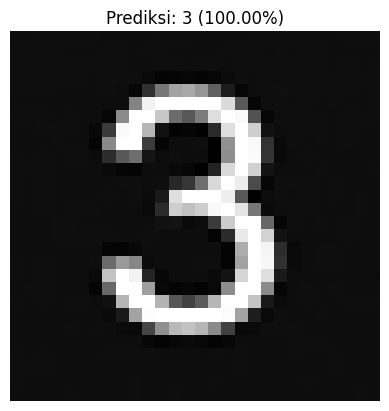

In [30]:
# Visualisasi Gambar & Hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Prediksi: {predicted_class} ({confidence:.2%})")
plt.axis('off')
plt.show()
